# Assignment - 2
## Bayes Classifier from scratch

In [609]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

## initializing iris dataset

In [610]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris_data = pd.DataFrame(X, columns=iris.feature_names)
iris_data['species'] = y

In [611]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## taking only 2 classes setosa and versicolor

In [612]:
X = X[:100]
y = y[:100]
X.shape, y.shape

((100, 4), (100,))

In [613]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## dividing the dataset into training and testing

In [614]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
X_train.shape, y_train.shape

((80, 4), (80,))

## calculating prior probablities

In [615]:
prior_setosa = 0
prior_versicolor = 0

for i in range(0, len(y_train)):
    if y[i] == 0:
        prior_setosa+=1
    else:
        prior_versicolor+=1

prior_setosa = prior_setosa / len(y_train)
prior_versicolor = prior_versicolor / len(y_train)
prior_setosa, prior_versicolor

(0.625, 0.375)

In [616]:
prior_versicolor+prior_setosa

1.0

### divide the train dataset into two parts  class 0 and class 1

In [617]:
y_train_class_0 = y_train[y_train == 0]
y_train_class_1 = y_train[y_train == 1]
X_train_class_0 = X_train[y_train == 0]
X_train_class_1 = X_train[y_train == 1]

### divide the test dataset into two parts  class 0 and class 1

In [618]:
y_test_class_0 = y_test[y_test == 0]
y_test_class_1 = y_test[y_test == 1]
X_test_class_0 = X_test[y_test == 0]
X_test_class_1 = X_test[y_test == 1]

len(X_test_class_0), len(X_test_class_1)

(10, 10)

In [619]:
mean_0 = np.mean(X_train_class_0, axis=0)
var_0 = np.var(X_train_class_0, axis=0)

mean_1 = np.mean(X_train_class_1, axis=0)
var_1 = np.var(X_train_class_1, axis=0)

mean_0, var_0, mean_1, var_1

(array([4.9975, 3.43  , 1.455 , 0.2425]),
 array([0.12674375, 0.1536    , 0.026975  , 0.00994375]),
 array([5.8975, 2.755 , 4.2225, 1.3075]),
 array([0.25374375, 0.093475  , 0.20524375, 0.03319375]))

In [620]:
def normalize_probablity(probability):
    min_val = min(probability)
    max_val = max(probability)

    if max_val == min_val:
        return [0.5]*len(probability)
    
    normalized = [(x - min_val) / (max_val - min_val) for x in probability]
    return normalized

    

## gaussian bayes classifier

In [621]:
def gaussian_likelihood(x, mean, variance):
    exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
    return (1 / np.sqrt(2 * np.pi * variance)) * exponent

class_0_data = []
for i in range(0,len(X_test)):
    val = X_test[i]
    prod = 1
    for i in range(0,4):
        prod = prod * gaussian_likelihood(val[i], mean_0[i], var_0[i])
    prod = prod * prior_setosa
    class_0_data.append(float(prod))

class_1_data = []
for i in range(0,len(X_test)):
    val = X_test[i]
    prod = 1
    for i in range(0,4):
        prod = prod * gaussian_likelihood(val[i], mean_1[i], var_1[i])
    prod = prod * prior_versicolor
    class_1_data.append(float(prod))


In [622]:
len(class_0_data), len(class_1_data)

(20, 20)

In [623]:
min_zero_val = min(class_0_data)
max_zero_val = max(class_0_data)

min_one_val = min(class_1_data)
max_one_val = max(class_1_data)

class_1_data = normalize_probablity(class_1_data)
class_0_data = normalize_probablity(class_0_data)

In [624]:
print(class_0_data)

[3.738702028763711e-145, 5.533850363076445e-94, 0.4250423591597982, 0.005499982686085032, 1.4083630972683932e-128, 0.5917207093987004, 0.19574131782837556, 0.26020352927164003, 0.9976431209551482, 1.0, 4.275801241378385e-126, 2.237534634928228e-42, 2.922001596719196e-82, 7.078225765520081e-75, 0.029712529969003667, 0.0, 0.01302090375586964, 3.835944007443927e-117, 1.3724207653312107e-99, 0.09589726910175875]


In [625]:
print(class_1_data)

[0.006198540243564792, 0.8322806986133732, 1.6480843594314028e-19, 1.038530435259014e-14, 0.03650522093641932, 7.697953467965192e-19, 0.0, 3.9598751778381345e-19, 6.916546361564244e-19, 2.1781999358751203e-18, 0.12060452180534925, 0.003182224915653395, 0.9130524735834741, 1.0, 6.529341543174214e-16, 0.007144722600296803, 9.119510508795317e-13, 0.646822735692361, 0.3456613684530333, 4.887518846729713e-21]


## predicting class label based on feature vector

In [626]:
class_label_output = []
for i in range(0, len(class_0_data)):
    if class_0_data[i]>class_1_data[i]:
        class_label_output.append(0)
    else:
        class_label_output.append(1)
class_label_output

[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]

In [627]:
print(class_label_output)
print(y_test)

[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
[1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0]


## evaluation and confusion matrix


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           10            0
Actual 1            0           10

Accuracy: 100.0


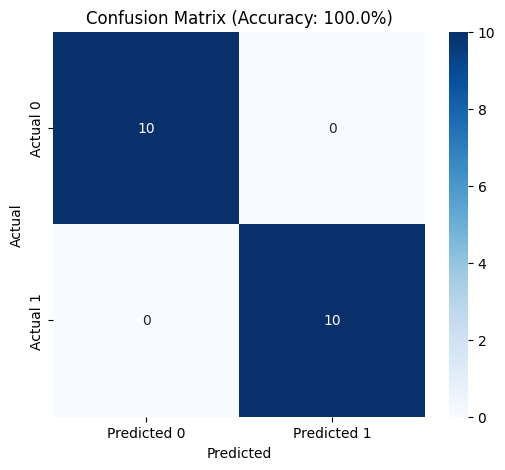

In [628]:
import seaborn as sns
def evaluate_predictions(y_actual, y_pred):
    conf_matrix = confusion_matrix(y_actual, y_pred)

    conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
    
    accuracy = accuracy_score(y_actual, y_pred) * 100
    
    print("\nConfusion Matrix:")
    print(conf_matrix_df)
    print("\nAccuracy:", round(accuracy, 4))

    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"Confusion Matrix (Accuracy: {round(accuracy, 2)}%)")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


evaluate_predictions(y_test, class_label_output)


## testing user input feature vector

In [629]:
user_data = [5.7,	3.0,	4.2,	1.2]
product = 1
for i in range(0,4):
  product = product*gaussian_likelihood(user_data[i],mean_0[i],var_0[i])
product = product * prior_setosa

min_val = min(class_0_data)
max_val = max(class_0_data)

normalized_value_zero = (product - min_val) / (max_val - min_val)

productq = 1
for i in range(0,4):
  productq = productq*gaussian_likelihood(user_data[i],mean_1[i],var_1[i])
productq = productq * prior_setosa

min_val = min(class_1_data)
max_val = max(class_1_data)

normalized_value_one = (productq - min_val) / (max_val - min_val)

if(normalized_value_zero>normalized_value_one):
  print("class 0: setosa")
else:
  print("class 1: versicolor")

class 1: versicolor
